# Introducción a Pandas

Pandas es una librería de Python especializada en el manejo y análisis de datos estructurados. Es una herramienta fundamental en el análisis de datos y la ciencia de datos.

## Importación de la librería

Es común importar pandas con el alias `pd`:

In [14]:
import pandas as pd
import numpy as np  # También importaremos numpy ya que se usa frecuentemente con pandas

# Verificar la versión de pandas instalada
print("Versión de Pandas:", pd.__version__)

Versión de Pandas: 2.2.3


## Estructuras de Datos en Pandas

Pandas tiene dos estructuras de datos principales:

1. **Series**: Arrays unidimensionales etiquetados
2. **DataFrame**: Tablas bidimensionales con columnas que pueden ser de diferentes tipos

### Series
Una Serie es similar a un array unidimensional o una columna en una tabla:

In [15]:
# Crear una Serie desde una lista
serie = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
print("Serie simple:")
print(serie)

# Acceder a elementos
print("\nValor en índice 'c':", serie['c'])

# Operaciones con Series
print("\nSerie multiplicada por 2:")
print(serie * 2)

Serie simple:
a    1
b    2
c    3
d    4
e    5
dtype: int64

Valor en índice 'c': 3

Serie multiplicada por 2:
a     2
b     4
c     6
d     8
e    10
dtype: int64


### DataFrame
Un DataFrame es una estructura tabular bidimensional:

In [16]:
# Crear un DataFrame desde un diccionario
data = {
    'Nombre': ['Juan', 'Ana', 'Carlos', 'María'],
    'Edad': [25, 28, 22, 30],
    'Ciudad': ['Madrid', 'Barcelona', 'Sevilla', 'Valencia']
}

df = pd.DataFrame(data)
print("DataFrame de ejemplo:")
print(df)

DataFrame de ejemplo:
   Nombre  Edad     Ciudad
0    Juan    25     Madrid
1     Ana    28  Barcelona
2  Carlos    22    Sevilla
3   María    30   Valencia


## Operaciones Básicas con DataFrames

In [17]:
# Información básica del DataFrame
print("Información del DataFrame:")
print(df.info())

print("\nPrimeras 2 filas:")
print(df.head(2))

print("\nÚltimas 2 filas:")
print(df.tail(2))

print("\nEstadísticas descriptivas:")
print(df.describe())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  4 non-null      object
 1   Edad    4 non-null      int64 
 2   Ciudad  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes
None

Primeras 2 filas:
  Nombre  Edad     Ciudad
0   Juan    25     Madrid
1    Ana    28  Barcelona

Últimas 2 filas:
   Nombre  Edad    Ciudad
2  Carlos    22   Sevilla
3   María    30  Valencia

Estadísticas descriptivas:
        Edad
count   4.00
mean   26.25
std     3.50
min    22.00
25%    24.25
50%    26.50
75%    28.50
max    30.00


## Selección y Filtrado de Datos

In [18]:
# Seleccionar una columna
print("Columna 'Nombre':")
print(df['Nombre'])

# Seleccionar múltiples columnas
print("\nColumnas 'Nombre' y 'Edad':")
print(df[['Nombre', 'Edad']])

# Filtrar filas
print("\nPersonas mayores de 25 años:")
print(df[df['Edad'] > 25])

Columna 'Nombre':
0      Juan
1       Ana
2    Carlos
3     María
Name: Nombre, dtype: object

Columnas 'Nombre' y 'Edad':
   Nombre  Edad
0    Juan    25
1     Ana    28
2  Carlos    22
3   María    30

Personas mayores de 25 años:
  Nombre  Edad     Ciudad
1    Ana    28  Barcelona
3  María    30   Valencia


## Manejo de Datos Faltantes

In [19]:
# Crear DataFrame con valores faltantes
df_nan = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [5, np.nan, np.nan, 8],
    'C': [9, 10, 11, 12]
})

print("DataFrame con valores faltantes:")
print(df_nan)

# Verificar valores faltantes
print("\nVerificar valores faltantes:")
print(df_nan.isnull())

# Eliminar filas con valores faltantes
print("\nEliminar filas con valores faltantes:")
print(df_nan.dropna())

# Rellenar valores faltantes
print("\nRellenar valores faltantes con 0:")
print(df_nan.fillna(0))

DataFrame con valores faltantes:
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12

Verificar valores faltantes:
       A      B      C
0  False  False  False
1  False   True  False
2   True   True  False
3  False  False  False

Eliminar filas con valores faltantes:
     A    B   C
0  1.0  5.0   9
3  4.0  8.0  12

Rellenar valores faltantes con 0:
     A    B   C
0  1.0  5.0   9
1  2.0  0.0  10
2  0.0  0.0  11
3  4.0  8.0  12


## Operaciones de Agrupación y Agregación

In [20]:
# Crear un DataFrame más grande para ejemplos de agrupación
data_ventas = {
    'Vendedor': ['Juan', 'Ana', 'Juan', 'María', 'Ana', 'María'],
    'Producto': ['A', 'B', 'B', 'A', 'A', 'B'],
    'Ventas': [100, 150, 200, 300, 250, 175]
}

df_ventas = pd.DataFrame(data_ventas)
print("DataFrame de ventas:")
print(df_ventas)

# Agrupar por vendedor y calcular suma de ventas
print("\nVentas totales por vendedor:")
print(df_ventas.groupby('Vendedor')['Ventas'].sum())

# Agrupar por vendedor y producto
print("\nVentas promedio por vendedor y producto:")
print(df_ventas.groupby(['Vendedor', 'Producto'])['Ventas'].mean())

DataFrame de ventas:
  Vendedor Producto  Ventas
0     Juan        A     100
1      Ana        B     150
2     Juan        B     200
3    María        A     300
4      Ana        A     250
5    María        B     175

Ventas totales por vendedor:
Vendedor
Ana      400
Juan     300
María    475
Name: Ventas, dtype: int64

Ventas promedio por vendedor y producto:
Vendedor  Producto
Ana       A           250.0
          B           150.0
Juan      A           100.0
          B           200.0
María     A           300.0
          B           175.0
Name: Ventas, dtype: float64


## Fusión y Combinación de DataFrames

In [21]:
# Crear dos DataFrames para combinar
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Nombre': ['Juan', 'Ana', 'Carlos', 'María']
})

df2 = pd.DataFrame({
    'ID': [1, 2, 3, 5],
    'Salario': [30000, 35000, 40000, 45000]
})

print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)

# Merge (unión) de DataFrames
print("\nUnión inner de DataFrames:")
print(pd.merge(df1, df2, on='ID'))

print("\nUnión outer de DataFrames:")
print(pd.merge(df1, df2, on='ID', how='outer'))

DataFrame 1:
   ID  Nombre
0   1    Juan
1   2     Ana
2   3  Carlos
3   4   María

DataFrame 2:
   ID  Salario
0   1    30000
1   2    35000
2   3    40000
3   5    45000

Unión inner de DataFrames:
   ID  Nombre  Salario
0   1    Juan    30000
1   2     Ana    35000
2   3  Carlos    40000

Unión outer de DataFrames:
   ID  Nombre  Salario
0   1    Juan  30000.0
1   2     Ana  35000.0
2   3  Carlos  40000.0
3   4   María      NaN
4   5     NaN  45000.0


## Obtención de Datos desde la Web

NumPy puede trabajar con datos obtenidos de páginas web. Para esto, generalmente se combina con otras librerías como `requests` y `pandas`:

In [27]:
import numpy as np
import requests
import pandas as pd
from io import StringIO

# Ejemplo 1: Obtener datos CSV desde una URL
url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'

try:
    # Descargar los datos
    response = requests.get(url)
    response.raise_for_status()  # Verificar si hubo errores
    
    # Convertir a DataFrame y luego a array de NumPy
    df = pd.read_csv(StringIO(response.text))
    datos_array = df.to_numpy()


except requests.exceptions.RequestException as e:
    print(f"Error al descargar los datos: {e}")

df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


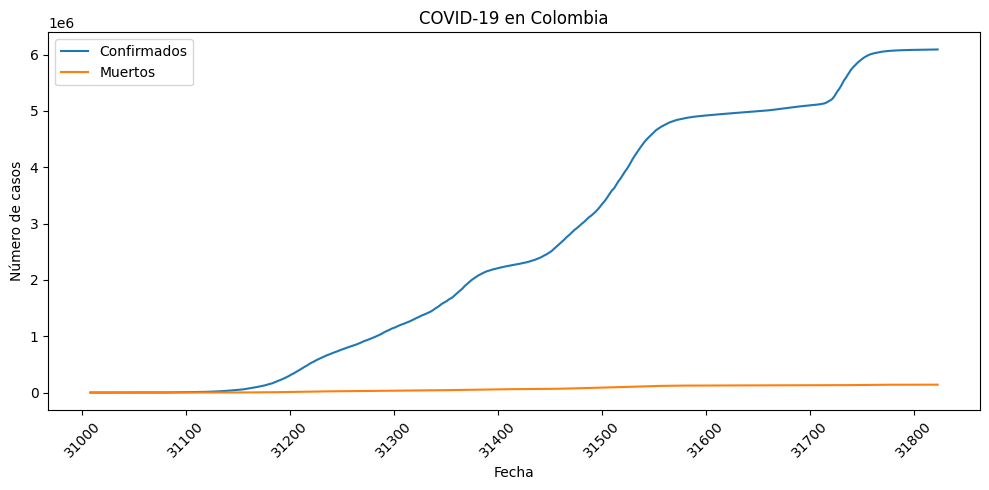

In [23]:
# Filtrar por país
pais = 'Colombia'
df_colombia = df[df['Country'] == pais]
# Graficar los datos
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot( df_colombia['Confirmed'], label='Confirmados')
plt.plot(df_colombia['Deaths'], label='Muertos')
plt.title(f'COVID-19 en {pais}')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

## Exportación e Importación de Datos

Pandas puede leer y escribir datos en varios formatos:

In [24]:
# Guardar DataFrame en diferentes formatos
df.to_csv('datos.csv', index=False)  # CSV
#df.to_excel('datos.xlsx', index=False)  # Excel (requiere openpyxl)

# Leer datos desde diferentes formatos
df_csv = pd.read_csv('datos.csv')
# df_excel = pd.read_excel('datos.xlsx')

print("DataFrame guardado en CSV")

DataFrame guardado en CSV


## Resumen de Funciones Importantes en Pandas

### Creación de Datos
```python
pd.DataFrame(data)           # Crear DataFrame
pd.Series(data)              # Crear Serie
pd.date_range()              # Crear rango de fechas
pd.read_csv()                # Leer archivo CSV
pd.read_excel()              # Leer archivo Excel
```

### Información y Selección
```python
df.info()                    # Información del DataFrame
df.describe()                # Estadísticas descriptivas
df.head()                    # Primeras filas
df.tail()                    # Últimas filas
df['columna']                # Seleccionar columna
df.loc[]                     # Selección por etiqueta
df.iloc[]                    # Selección por posición
```

### Limpieza de Datos
```python
df.dropna()                  # Eliminar valores faltantes
df.fillna()                  # Rellenar valores faltantes
df.drop_duplicates()         # Eliminar duplicados
df.rename()                  # Renombrar columnas
```

### Manipulación
```python
df.sort_values()             # Ordenar valores
df.groupby()                 # Agrupar datos
pd.merge()                   # Combinar DataFrames
pd.concat()                  # Concatenar DataFrames
df.pivot_table()             # Crear tabla pivote
```

### Análisis
```python
df.mean()                    # Media
df.median()                  # Mediana
df.std()                     # Desviación estándar
df.corr()                    # Correlación
df.value_counts()            # Contar valores únicos
```

### Exportación
```python
df.to_csv()                  # Exportar a CSV
df.to_excel()                # Exportar a Excel
df.to_json()                 # Exportar a JSON
df.to_sql()                  # Exportar a SQL
```